In [2]:
# Initial setup:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 1

#For fancy plots
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

import numpy as np
#from numpy import random
#np.random.seed(42) # Set seed for reproducibility

from scipy.stats import  gamma
from scipy.special import erfcinv
from scipy.linalg import sqrtm

import getdist
from getdist import plots, MCSamples
getdist.chains.print_load_details = False

import git, os

In [3]:
def calculate_R_CM(vectors):
    num_vectors = len(vectors)
    R_CM = np.sum(vectors, axis=0) / num_vectors
    return R_CM

def beta_statistic(diff_mean_1, diff_mean_2, diff_mean_3, cov_1, cov_2, cov_3):
    """
    Calculate the beta parameter for the given distributions.
    
    Parameters:
    diff_mean_1, diff_mean_2, diff_mean_3: Mean differences for each distribution.
    cov_1, cov_2, cov_3: Covariance matrices for each distribution.
    
    Returns:
    beta: The beta parameter.
    """
    
    beta = np.dot(diff_mean_1, np.linalg.solve(cov_1, diff_mean_1)) + \
           np.dot(diff_mean_2, np.linalg.solve(cov_2, diff_mean_2)) + \
           np.dot(diff_mean_3, np.linalg.solve(cov_3, diff_mean_3))
           
    
    return beta

'''
def Q_tot(diff_mean_1, diff_mean_2, diff_mean_3, cov_1, cov_2, cov_3, n_samples, L):
    
    # Sampling
    X = np.dot(sqrtm(np.linalg.inv(cov_1)), np.random.multivariate_normal(0*diff_mean_1, cov_1, size=n_samples).T)  # Shape: (d, n_samples)
    Y = np.dot(sqrtm(np.linalg.inv(cov_2)), np.random.multivariate_normal(0*diff_mean_2, cov_2, size=n_samples).T)  # Shape: (d, n_samples)
    Z = np.dot(sqrtm(np.linalg.inv(cov_3)), np.random.multivariate_normal(0*diff_mean_3, cov_3, size=n_samples).T)  # Shape: (d, n_samples)

    r_tot = X + Y + Z

    # Compute W for each sample
    Q = np.zeros(n_samples)  # Initialize W
    for i in range(n_samples):
        Q[i] = np.dot(r_tot[:, i], r_tot[:, i])  # Shape: (n_samples,)

    return Q / L**2
'''


'\ndef Q_tot(diff_mean_1, diff_mean_2, diff_mean_3, cov_1, cov_2, cov_3, n_samples, L):\n    \n    # Sampling\n    X = np.dot(sqrtm(np.linalg.inv(cov_1)), np.random.multivariate_normal(0*diff_mean_1, cov_1, size=n_samples).T)  # Shape: (d, n_samples)\n    Y = np.dot(sqrtm(np.linalg.inv(cov_2)), np.random.multivariate_normal(0*diff_mean_2, cov_2, size=n_samples).T)  # Shape: (d, n_samples)\n    Z = np.dot(sqrtm(np.linalg.inv(cov_3)), np.random.multivariate_normal(0*diff_mean_3, cov_3, size=n_samples).T)  # Shape: (d, n_samples)\n\n    r_tot = X + Y + Z\n\n    # Compute W for each sample\n    Q = np.zeros(n_samples)  # Initialize W\n    for i in range(n_samples):\n        Q[i] = np.dot(r_tot[:, i], r_tot[:, i])  # Shape: (n_samples,)\n\n    return Q / L**2\n'

# Dataset A

$\beta$ statistic: 150.0
$|RCM|^2$: 22.222222222222225
PTE = 3.338237795364977e-15
n_sigma = 7.877564534911438


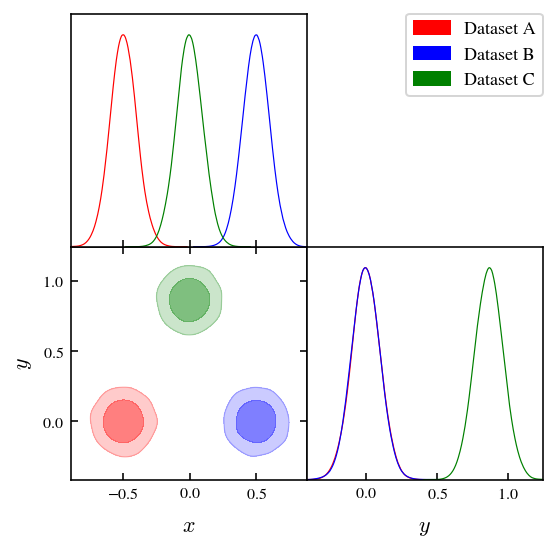

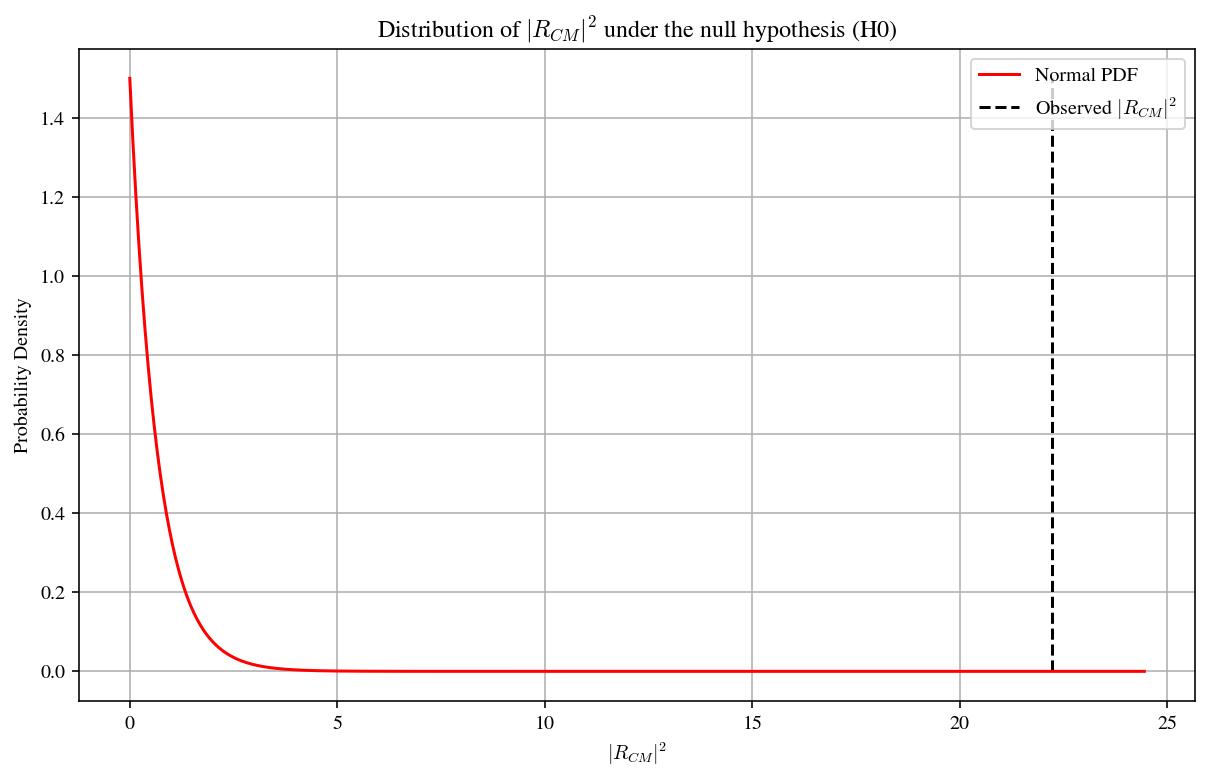

In [4]:
# Fixed constants
# Parameters
d = 2  # Dimension
N = 3 # Number of datasets
L = N*(N-1)/2  # Number of tension vectors

#n_samples = int(1e7)  # Number of samples


mean_A = np.array([-1/2., 0.]) 
mean_B = np.array([1/2, 0.])
mean_C = np.array([0, np.sqrt(3)/2.])

cov_A = np.array([[0.01, 0.], [0., 0.01]])
cov_B = cov_A.copy()
cov_C = cov_A.copy()

samps_A = np.random.multivariate_normal(mean_A, cov_A, size=10000)
samps_B = np.random.multivariate_normal(mean_B, cov_B, size=10000)
samps_C = np.random.multivariate_normal(mean_C, cov_C, size=10000)

names = ['x', 'y']
labels = ['x', 'y']

chain_A = MCSamples(samples=samps_A, names=names, labels=labels, label='Dataset A')
chain_B = MCSamples(samples=samps_B, names=names, labels=labels, label='Dataset B')
chain_C = MCSamples(samples=samps_C, names=names, labels=labels, label='Dataset C')

colors = ['red', 'blue', 'green']

g = plots.get_subplot_plotter()
g = plots.get_subplot_plotter()
g.triangle_plot([chain_A, chain_B, chain_C],\
                filled=True, contour_args={'alpha':0.5},\
                contour_colors=colors)

cov_1 = cov_A + cov_B
cov_2 = cov_A + cov_C
cov_3 = cov_B + cov_C
diff_mean_1 = mean_A - mean_B
diff_mean_2 = mean_A - mean_C
diff_mean_3 = mean_B - mean_C

r_1 = np.dot(sqrtm(np.linalg.inv(cov_1)), diff_mean_1)
r_2 = np.dot(sqrtm(np.linalg.inv(cov_2)), diff_mean_2)
r_3 = np.dot(sqrtm(np.linalg.inv(cov_3)), diff_mean_3)

# Compute some statistic values:
vectors = np.array([r_1, r_2, r_3])
R_CM = calculate_R_CM(vectors)
beta = beta_statistic(diff_mean_1, diff_mean_2, diff_mean_3, cov_1, cov_2, cov_3)
print(r'$\beta$ statistic: {}'.format(beta))
print(r'$|RCM|^2$: {}'.format(np.linalg.norm(R_CM)**2))

PTE = gamma(a=d/2, scale=2/L).sf(np.linalg.norm(R_CM)**2)
n_sigma = np.sqrt(2)*erfcinv(PTE)
print(f'PTE = {PTE}')
print(f'n_sigma = {n_sigma}')

# Plot histogram
plt.figure(figsize=(10, 6))
t=np.linspace(0, 1.1*np.linalg.norm(R_CM)**2, 1000)
plt.plot(t, gamma.pdf(t,a=d/2, scale=2/L), color='red', label='Normal PDF')
plt.fill_between(t[t >= np.linalg.norm(R_CM)**2], 0, gamma.pdf(t[t >= np.linalg.norm(R_CM)**2], a=d/2, scale=2/L), alpha=0.7)
plt.vlines(x=np.linalg.norm(R_CM)**2, ymin=0, ymax=gamma.pdf(0,a=d/2, scale=2/L), color='black', linestyle='--', label='Observed $|R_{CM}|^2$')
plt.title('Distribution of $|R_{CM}|^2$ under the null hypothesis (H0)')
plt.xlabel('$|R_{CM}|^2$')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()

# Dataset A-2 (caso intermedio)

$\beta$ statistic: 15.0
$|RCM|^2$: 2.2222222222222223
PTE = 0.035673993347252395
n_sigma = 2.1006239112527814


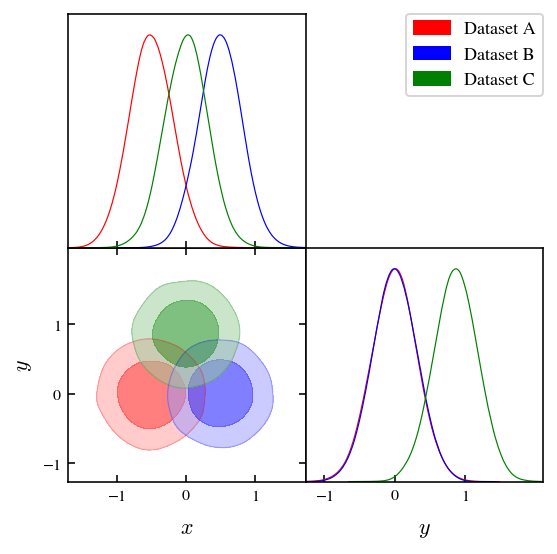

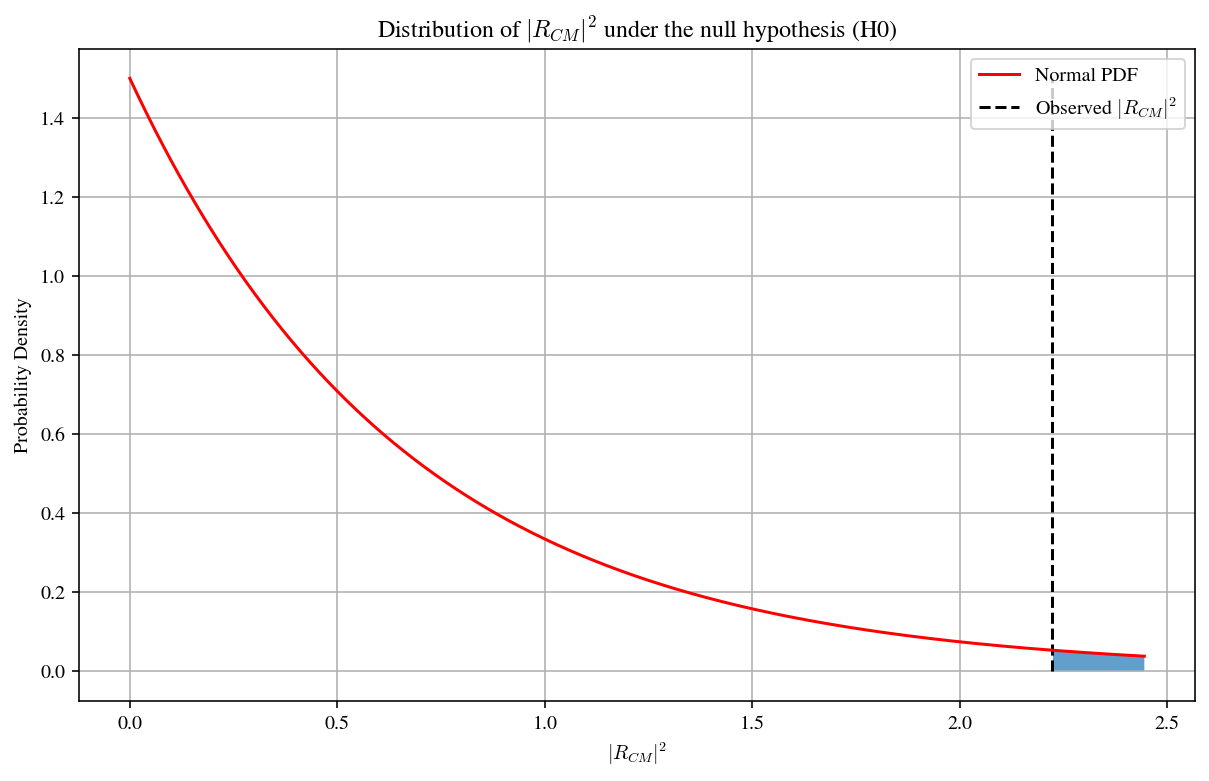

In [5]:
# Fixed constants
# Parameters
d = 2  # Dimension
N = 3 # Number of datasets
L = N*(N-1)/2  # Number of tension vectors

#n_samples = int(1e7)  # Number of samples


mean_A = np.array([-1/2., 0.]) 
mean_B = np.array([1/2, 0.])
mean_C = np.array([0, np.sqrt(3)/2.])

cov_A = np.array([[0.1, 0.], [0., 0.1]])
cov_B = cov_A.copy()
cov_C = cov_A.copy()

samps_A = np.random.multivariate_normal(mean_A, cov_A, size=10000)
samps_B = np.random.multivariate_normal(mean_B, cov_B, size=10000)
samps_C = np.random.multivariate_normal(mean_C, cov_C, size=10000)

names = ['x', 'y']
labels = ['x', 'y']

chain_A = MCSamples(samples=samps_A, names=names, labels=labels, label='Dataset A')
chain_B = MCSamples(samples=samps_B, names=names, labels=labels, label='Dataset B')
chain_C = MCSamples(samples=samps_C, names=names, labels=labels, label='Dataset C')

colors = ['red', 'blue', 'green']

g = plots.get_subplot_plotter()
g = plots.get_subplot_plotter()
g.triangle_plot([chain_A, chain_B, chain_C],\
                filled=True, contour_args={'alpha':0.5},\
                contour_colors=colors)

cov_1 = cov_A + cov_B
cov_2 = cov_A + cov_C
cov_3 = cov_B + cov_C
diff_mean_1 = mean_A - mean_B
diff_mean_2 = mean_A - mean_C
diff_mean_3 = mean_B - mean_C

r_1 = np.dot(sqrtm(np.linalg.inv(cov_1)), diff_mean_1)
r_2 = np.dot(sqrtm(np.linalg.inv(cov_2)), diff_mean_2)
r_3 = np.dot(sqrtm(np.linalg.inv(cov_3)), diff_mean_3)

# Compute some statistic values:
vectors = np.array([r_1, r_2, r_3])
R_CM = calculate_R_CM(vectors)
beta = beta_statistic(diff_mean_1, diff_mean_2, diff_mean_3, cov_1, cov_2, cov_3)
print(r'$\beta$ statistic: {}'.format(beta))
print(r'$|RCM|^2$: {}'.format(np.linalg.norm(R_CM)**2))

PTE = gamma(a=d/2, scale=2/L).sf(np.linalg.norm(R_CM)**2)
n_sigma = np.sqrt(2)*erfcinv(PTE)
print(f'PTE = {PTE}')
print(f'n_sigma = {n_sigma}')

# Plot histogram
plt.figure(figsize=(10, 6))
t=np.linspace(0, 1.1*np.linalg.norm(R_CM)**2, 1000)
plt.plot(t, gamma.pdf(t,a=d/2, scale=2/L), color='red', label='Normal PDF')
plt.fill_between(t[t >= np.linalg.norm(R_CM)**2], 0, gamma.pdf(t[t >= np.linalg.norm(R_CM)**2], a=d/2, scale=2/L), alpha=0.7)
plt.vlines(x=np.linalg.norm(R_CM)**2, ymin=0, ymax=gamma.pdf(0,a=d/2, scale=2/L), color='black', linestyle='--', label='Observed $|R_{CM}|^2$')
plt.title('Distribution of $|R_{CM}|^2$ under the null hypothesis (H0)')
plt.xlabel('$|R_{CM}|^2$')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()

# Dataset B

$\beta$ statistic: 1.5
$|RCM|^2$: 0.22222222222222227
PTE = 0.7165313105737892
n_sigma = 0.3630984926671722


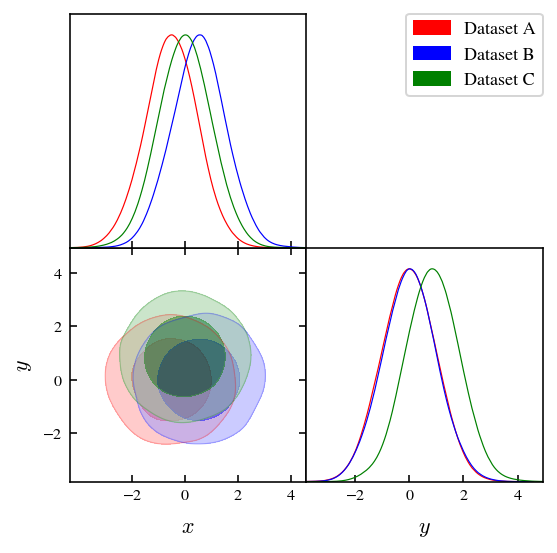

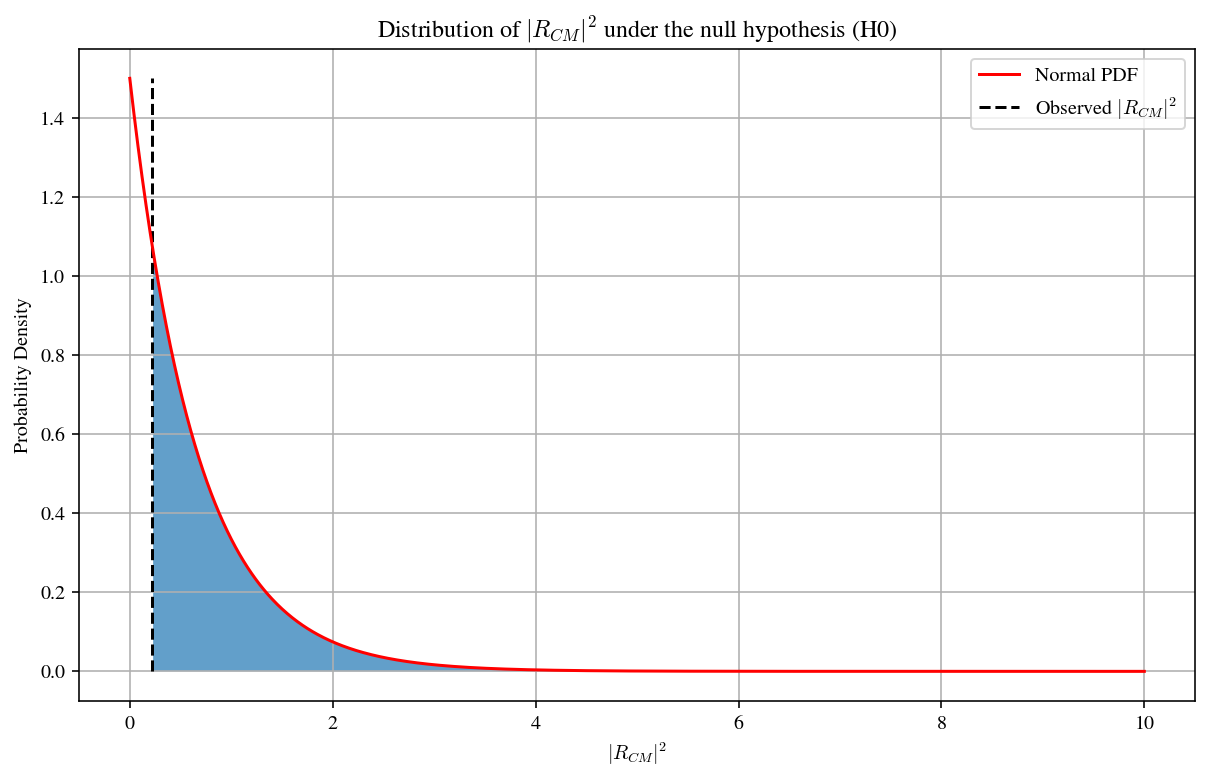

In [ ]:
# Fixed constants
# Parameters
d = 2  # Dimension
N = 3 # Number of datasets
L = N*(N-1)/2  # Number of tension vectors

#n_samples = int(1e6)  # Number of samples


mean_A = np.array([-1/2., 0.]) 
mean_B = np.array([1/2, 0.])
mean_C = np.array([0, np.sqrt(3)/2.])

cov_A = 100*np.array([[0.01, 0.], [0., 0.01]])
cov_B = cov_A.copy()
cov_C = cov_A.copy()

samps_A = np.random.multivariate_normal(mean_A, cov_A, size=10000)
samps_B = np.random.multivariate_normal(mean_B, cov_B, size=10000)
samps_C = np.random.multivariate_normal(mean_C, cov_C, size=10000)

names = ['x', 'y']
labels = ['x', 'y']

chain_A = MCSamples(samples=samps_A, names=names, labels=labels, label='Dataset A')
chain_B = MCSamples(samples=samps_B, names=names, labels=labels, label='Dataset B')
chain_C = MCSamples(samples=samps_C, names=names, labels=labels, label='Dataset C')

colors = ['red', 'blue', 'green']

g = plots.get_subplot_plotter()
g = plots.get_subplot_plotter()
g.triangle_plot([chain_A, chain_B, chain_C],\
                filled=True, contour_args={'alpha':0.5},\
                contour_colors=colors)

cov_1 = cov_A + cov_B
cov_2 = cov_A + cov_C
cov_3 = cov_B + cov_C
diff_mean_1 = mean_A - mean_B
diff_mean_2 = mean_A - mean_C
diff_mean_3 = mean_B - mean_C

r_1 = np.dot(sqrtm(np.linalg.inv(cov_1)), diff_mean_1)
r_2 = np.dot(sqrtm(np.linalg.inv(cov_2)), diff_mean_2)
r_3 = np.dot(sqrtm(np.linalg.inv(cov_3)), diff_mean_3)

# Compute some statistic values:
vectors = np.array([r_1, r_2, r_3])
R_CM = calculate_R_CM(vectors)
beta = beta_statistic(diff_mean_1, diff_mean_2, diff_mean_3, cov_1, cov_2, cov_3)
print(r'$\beta$ statistic: {}'.format(beta))
print(r'$|RCM|^2$: {}'.format(np.linalg.norm(R_CM)**2))

PTE = gamma(a=d/2, scale=2/L).sf(np.linalg.norm(R_CM)**2)
n_sigma = np.sqrt(2)*erfcinv(PTE)
print(f'PTE = {PTE}')
print(f'n_sigma = {n_sigma}')

# Plot histogram
plt.figure(figsize=(10, 6))
t=np.linspace(0, 10, 1000)
plt.plot(t, gamma.pdf(t,a=d/2, scale=2/L), color='red', label='Normal PDF')
plt.fill_between(t[t >= np.linalg.norm(R_CM)**2], 0, gamma.pdf(t[t >= np.linalg.norm(R_CM)**2], a=d/2, scale=2/L), alpha=0.7)
plt.vlines(x=np.linalg.norm(R_CM)**2, ymin=0, ymax=gamma.pdf(0,a=d/2, scale=2/L), color='black', linestyle='--', label='Observed $|R_{CM}|^2$')
plt.title('Distribution of $|R_{CM}|^2$ under the null hypothesis (H0)')
plt.xlabel('$|R_{CM}|^2$')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()

# Dataset C

$\beta$ statistic: 2.48019801980198
$|RCM|^2$: 0.38558855885588567
PTE = 0.5608045452900419
n_sigma = 0.5816468999498426


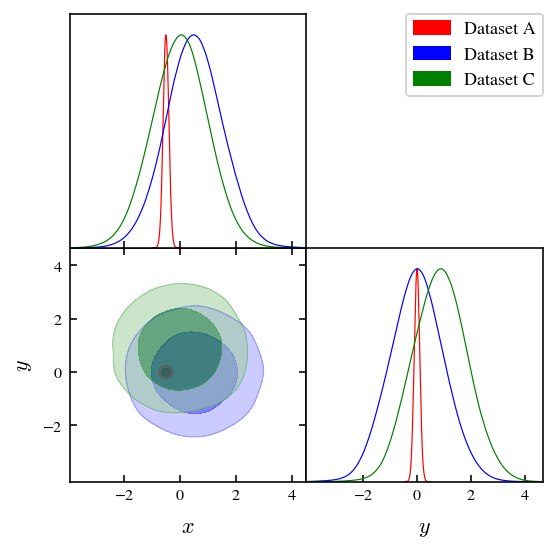

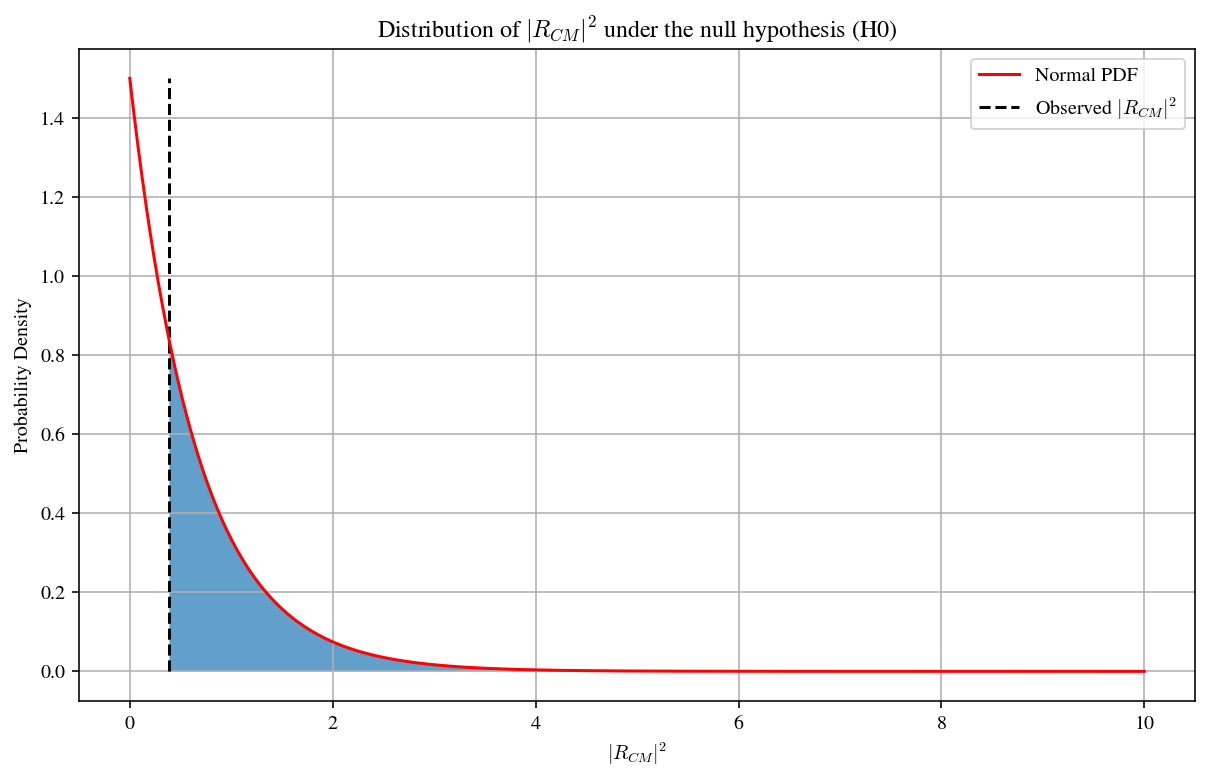

In [60]:
# Fixed constants
# Parameters
d = 2  # Dimension
N = 3 # Number of datasets
L = N*(N-1)/2  # Number of tension vectors

mean_A = np.array([-1/2., 0.]) 
mean_B = np.array([1/2, 0.])
mean_C = np.array([0, np.sqrt(3)/2.])

cov_A = np.array([[0.01, 0.], [0., 0.01]])
cov_B = 100*cov_A.copy()
cov_C = 100*cov_A.copy()

samps_A = np.random.multivariate_normal(mean_A, cov_A, size=10000)
samps_B = np.random.multivariate_normal(mean_B, cov_B, size=10000)
samps_C = np.random.multivariate_normal(mean_C, cov_C, size=10000)

names = ['x', 'y']
labels = ['x', 'y']

chain_A = MCSamples(samples=samps_A, names=names, labels=labels, label='Dataset A')
chain_B = MCSamples(samples=samps_B, names=names, labels=labels, label='Dataset B')
chain_C = MCSamples(samples=samps_C, names=names, labels=labels, label='Dataset C')

colors = ['red', 'blue', 'green']

g = plots.get_subplot_plotter()
g = plots.get_subplot_plotter()
g.triangle_plot([chain_A, chain_B, chain_C],\
                filled=True, contour_args={'alpha':0.5},\
                contour_colors=colors)

cov_1 = cov_A + cov_B
cov_2 = cov_A + cov_C
cov_3 = cov_B + cov_C
diff_mean_1 = mean_A - mean_B
diff_mean_2 = mean_A - mean_C
diff_mean_3 = mean_B - mean_C

r_1 = np.dot(sqrtm(np.linalg.inv(cov_1)), diff_mean_1)
r_2 = np.dot(sqrtm(np.linalg.inv(cov_2)), diff_mean_2)
r_3 = np.dot(sqrtm(np.linalg.inv(cov_3)), diff_mean_3)

# Compute some statistic values:
vectors = np.array([r_1, r_2, r_3])
R_CM = calculate_R_CM(vectors)
beta = beta_statistic(diff_mean_1, diff_mean_2, diff_mean_3, cov_1, cov_2, cov_3)
print(r'$\beta$ statistic: {}'.format(beta))
print(r'$|RCM|^2$: {}'.format(np.linalg.norm(R_CM)**2))

PTE = gamma(a=d/2, scale=2/L).sf(np.linalg.norm(R_CM)**2)
n_sigma = np.sqrt(2)*erfcinv(PTE)
print(f'PTE = {PTE}')
print(f'n_sigma = {n_sigma}')

# Plot histogram
plt.figure(figsize=(10, 6))
t=np.linspace(0, 10, 1000)
plt.plot(t, gamma.pdf(t,a=d/2, scale=2/L), color='red', label='Normal PDF')
plt.fill_between(t[t >= np.linalg.norm(R_CM)**2], 0, gamma.pdf(t[t >= np.linalg.norm(R_CM)**2], a=d/2, scale=2/L), alpha=0.7)
plt.vlines(x=np.linalg.norm(R_CM)**2, ymin=0, ymax=gamma.pdf(0,a=d/2, scale=2/L), color='black', linestyle='--', label='Observed $|R_{CM}|^2$')
plt.title('Distribution of $|R_{CM}|^2$ under the null hypothesis (H0)')
plt.xlabel('$|R_{CM}|^2$')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()

# Dataset D

$\beta$ statistic: 51.980198019801975
$|RCM|^2$: 5.885588558855886
PTE = 0.00014651498643069387
n_sigma = 3.796903169802241


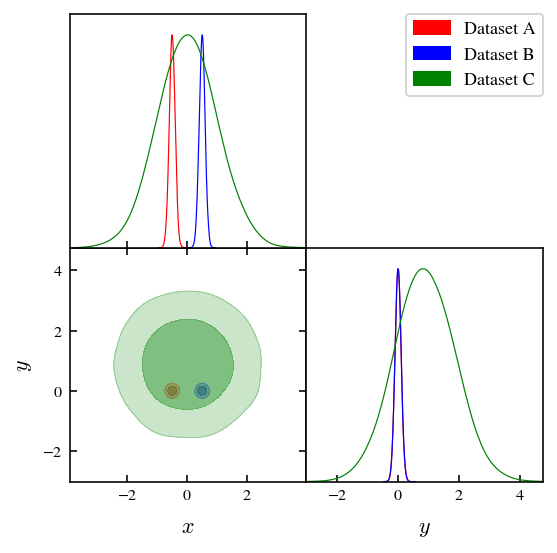

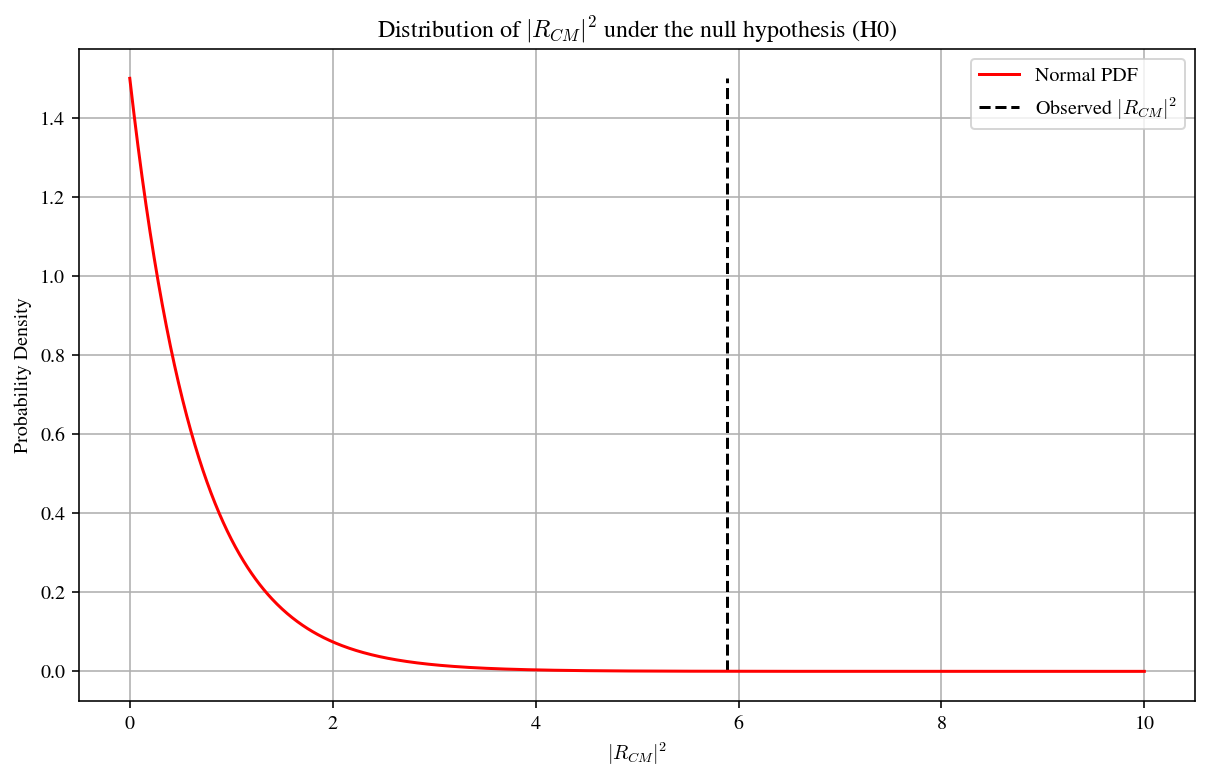

In [61]:
# Fixed constants
# Parameters
d = 2  # Dimension
N = 3  # Number of datasets
L = N*(N-1)/2  # Number of tension vectors


mean_A = np.array([-1/2., 0.]) 
mean_B = np.array([1/2, 0.])
mean_C = np.array([0, np.sqrt(3)/2.])

cov_A = np.array([[0.01, 0.], [0., 0.01]])
cov_B = cov_A.copy()
cov_C = 100*cov_A.copy()

samps_A = np.random.multivariate_normal(mean_A, cov_A, size=10000)
samps_B = np.random.multivariate_normal(mean_B, cov_B, size=10000)
samps_C = np.random.multivariate_normal(mean_C, cov_C, size=10000)

names = ['x', 'y']
labels = ['x', 'y']

chain_A = MCSamples(samples=samps_A, names=names, labels=labels, label='Dataset A')
chain_B = MCSamples(samples=samps_B, names=names, labels=labels, label='Dataset B')
chain_C = MCSamples(samples=samps_C, names=names, labels=labels, label='Dataset C')

colors = ['red', 'blue', 'green']

g = plots.get_subplot_plotter()
g = plots.get_subplot_plotter()
g.triangle_plot([chain_A, chain_B, chain_C],\
                filled=True, contour_args={'alpha':0.5},\
                contour_colors=colors)

cov_1 = cov_A + cov_B
cov_2 = cov_A + cov_C
cov_3 = cov_B + cov_C
diff_mean_1 = mean_A - mean_B
diff_mean_2 = mean_A - mean_C
diff_mean_3 = mean_B - mean_C

r_1 = np.dot(sqrtm(np.linalg.inv(cov_1)), diff_mean_1)
r_2 = np.dot(sqrtm(np.linalg.inv(cov_2)), diff_mean_2)
r_3 = np.dot(sqrtm(np.linalg.inv(cov_3)), diff_mean_3)

# Compute some statistic values:
vectors = np.array([r_1, r_2, r_3])
R_CM = calculate_R_CM(vectors)
beta = beta_statistic(diff_mean_1, diff_mean_2, diff_mean_3, cov_1, cov_2, cov_3)
print(r'$\beta$ statistic: {}'.format(beta))
print(r'$|RCM|^2$: {}'.format(np.linalg.norm(R_CM)**2))

PTE = gamma(a=d/2, scale=2/L).sf(np.linalg.norm(R_CM)**2)
n_sigma = np.sqrt(2)*erfcinv(PTE)
print(f'PTE = {PTE}')
print(f'n_sigma = {n_sigma}')

# Plot histogram
plt.figure(figsize=(10, 6))
t=np.linspace(0, 10, 1000)
plt.plot(t, gamma.pdf(t,a=d/2, scale=2/L), color='red', label='Normal PDF')
plt.fill_between(t[t >= np.linalg.norm(R_CM)**2], 0, gamma.pdf(t[t >= np.linalg.norm(R_CM)**2], a=d/2, scale=2/L), alpha=0.7)
plt.vlines(x=np.linalg.norm(R_CM)**2, ymin=0, ymax=gamma.pdf(0,a=d/2, scale=2/L), color='black', linestyle='--', label='Observed $|R_{CM}|^2$')
plt.title('Distribution of $|R_{CM}|^2$ under the null hypothesis (H0)')
plt.xlabel('$|R_{CM}|^2$')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()

# Real Data

In [ ]:
# Fixed constants
# Parameters
d = 2  # Dimension
N = 4  # Number of datasets
L = N*(N-1)/2  # Number of tension vectors

# Create the two toy chains and the joint chain:
path_git = git.Repo('.', search_parent_directories=True).working_tree_dir
os.chdir(os.path.join(path_git, 'multimeter', 'source'))

'''
A: CC 
B: Planck18 
C: BAO 
D: PPS
'''

chain_A = getdist.mcsamples.loadMCSamples(file_root='lcdm_cc/2023-09-18_1000000_', no_cache=True,settings={'loglikes':True,'label':'CC','ignore_rows': '0.3'})
chain_B = getdist.mcsamples.loadMCSamples(file_root='lcdm_planck/2023-09-16_1000000_', no_cache=True,settings={'loglikes':True,'label':'Planck18','ignore_rows': '0.3'})
chain_C = getdist.mcsamples.loadMCSamples(file_root='lcdm_bao_plus/2024-03-07_1000000_', no_cache=True,settings={'label':'BAO','ignore_rows': '0.3'})
chain_D = getdist.mcsamples.loadMCSamples(file_root='lcdm_pps/2023-09-18_1000000_', no_cache=True,settings={'label':'PPS','ignore_rows': '0.3'})

param_names = ['Omega_m','H0'] #Shared paameters
names=param_names
labels=param_names

#Estimate the mean and covariance of the chains:
mean_A = chain_A.mean(param_names)
cov_A = chain_A.cov(param_names)
mean_B = chain_B.mean(param_names)
cov_B = chain_B.cov(param_names)
mean_C = chain_C.mean(param_names)
cov_C = chain_C.cov(param_names)
mean_D = chain_D.mean(param_names)
cov_D = chain_D.cov(param_names)


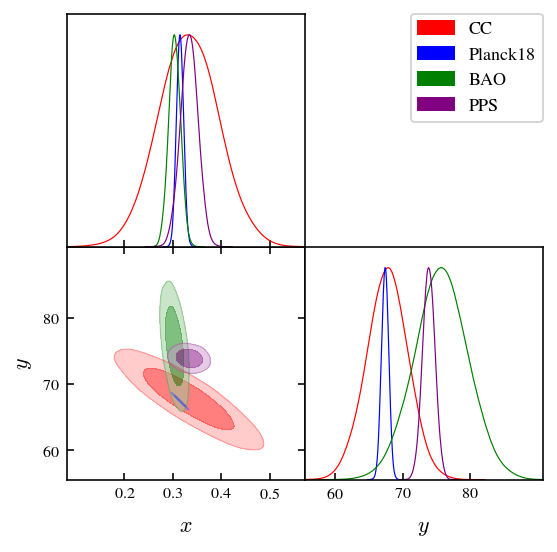

In [63]:
samps_A = np.random.multivariate_normal(mean_A, cov_A, size=10000)
samps_B = np.random.multivariate_normal(mean_B, cov_B, size=10000)
samps_C = np.random.multivariate_normal(mean_C, cov_C, size=10000)
samps_D = np.random.multivariate_normal(mean_D, cov_D, size=10000)

chain_A = MCSamples(samples=samps_A, names=names, labels=labels, label='Dataset A')
chain_B = MCSamples(samples=samps_B, names=names, labels=labels, label='Dataset B')
chain_C = MCSamples(samples=samps_C, names=names, labels=labels, label='Dataset C')
chain_D = MCSamples(samples=samps_D, names=names, labels=labels, label='Dataset D')

colors = ['red', 'blue', 'green', 'purple']


g = plots.get_subplot_plotter()
g.triangle_plot([chain_A, chain_B, chain_C, chain_D],\
                filled=True, contour_args={'alpha':0.5},\
                contour_colors=colors,
                legend_labels=['CC', 'Planck18', 'BAO', 'PPS'])
os.chdir(os.path.join(path_git, 'multimeter', 'source'))
g.export('dist_data.png')

Center of mass: [-1.1227663  -1.84922768]
PTE = 7.9833178583884e-07
n_sigma = 4.9357748142817535


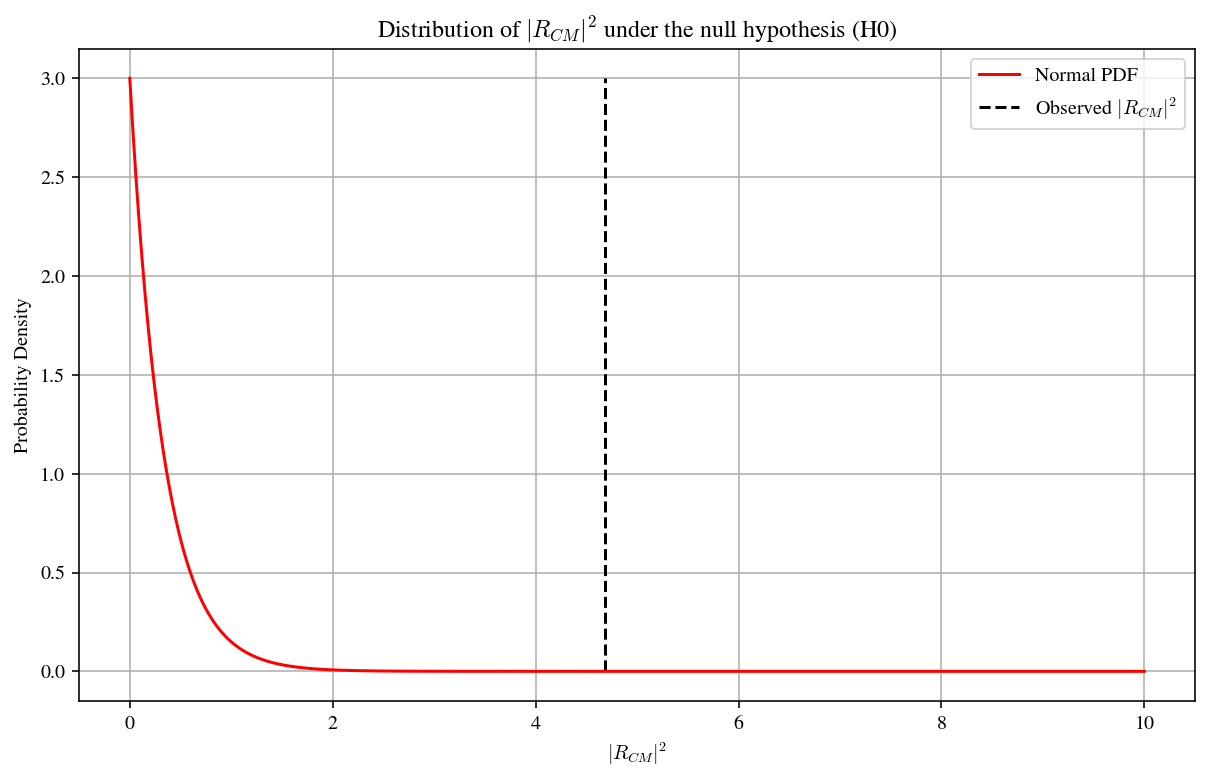

In [64]:
cov_1 = cov_A + cov_B
cov_2 = cov_A + cov_C
cov_3 = cov_B + cov_C
cov_4 = cov_A + cov_D
cov_5 = cov_B + cov_D
cov_6 = cov_C + cov_D

diff_mean_1 = mean_A - mean_B
diff_mean_2 = mean_A - mean_C
diff_mean_3 = mean_B - mean_C
diff_mean_4 = mean_A - mean_D
diff_mean_5 = mean_B - mean_D
diff_mean_6 = mean_C - mean_D

r_1 = np.dot(sqrtm(np.linalg.inv(cov_A + cov_B)), (mean_A - mean_B))
r_2 = np.dot(sqrtm(np.linalg.inv(cov_A + cov_C)), (mean_A - mean_C))
r_3 = np.dot(sqrtm(np.linalg.inv(cov_B + cov_C)), (mean_B - mean_C))
r_4 = np.dot(sqrtm(np.linalg.inv(cov_A + cov_D)), (mean_A - mean_D))
r_5 = np.dot(sqrtm(np.linalg.inv(cov_B + cov_D)), (mean_B - mean_D))
r_6 = np.dot(sqrtm(np.linalg.inv(cov_C + cov_D)), (mean_C - mean_D))

# Example usage:
vectors = np.array([r_1, r_2, r_3, r_4, r_5, r_6])
R_CM = calculate_R_CM(vectors)
print('Center of mass: {}'.format(R_CM))

PTE = gamma(a=d/2, scale=2/L).sf(np.linalg.norm(R_CM)**2)
n_sigma = np.sqrt(2)*erfcinv(PTE)
print(f'PTE = {PTE}')
print(f'n_sigma = {n_sigma}')

# Plot histogram
plt.figure(figsize=(10, 6))
t=np.linspace(0, 10, 1000)
plt.plot(t, gamma.pdf(t,a=d/2, scale=2/L), color='red', label='Normal PDF')
plt.fill_between(t[t >= np.linalg.norm(R_CM)**2], 0, gamma.pdf(t[t >= np.linalg.norm(R_CM)**2], a=d/2, scale=2/L), alpha=0.7)
plt.vlines(x=np.linalg.norm(R_CM)**2, ymin=0, ymax=gamma.pdf(0,a=d/2, scale=2/L), color='black', linestyle='--', label='Observed $|R_{CM}|^2$')
plt.title('Distribution of $|R_{CM}|^2$ under the null hypothesis (H0)')
plt.xlabel('$|R_{CM}|^2$')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()